### Importing necessary libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [97]:
# load the data into a Pandas DataFrame
data = pd.read_csv("Salary_Data.csv")

### Reading and cleaning the Data

In [98]:
data.head()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [99]:
#finding the shape of the data
data.shape

(30, 2)

In [100]:
#sorting the Salary data in an ascending order
data.sort_values("Salary")

,YearsofExperience,Salary
2,1.5,37731.0
0,1.1,39343.0
4,2.2,39891.0
3,2.0,43525.0
1,1.3,46205.0
7,3.2,54445.0
11,4.0,55794.0
5,2.9,56642.0
12,4.0,56957.0
13,4.1,57081.0


In [101]:
#sorting the Years of experience in ascending order
data.sort_values('YearsofExperience')

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [102]:
# removing the rows with empty cells
data.dropna()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [103]:
# removing the duplicates in the dataset
data.drop_duplicates()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [109]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Visualization of the Dataset to understand the data in a clearer way

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsofExperience'>

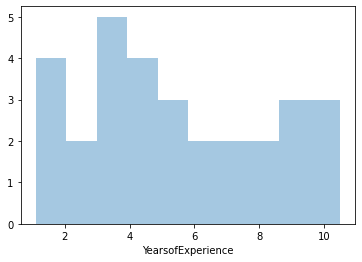

In [113]:
sns.distplot(data['YearsofExperience'],kde=False,bins=10)

<AxesSubplot:xlabel='count', ylabel='YearsofExperience'>

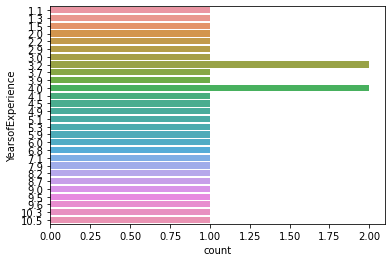

In [107]:
#shows the counts of observations in each categorical bin using bars
sns.countplot(y='YearsofExperience',data=data)

<AxesSubplot:xlabel='YearsofExperience', ylabel='Salary'>

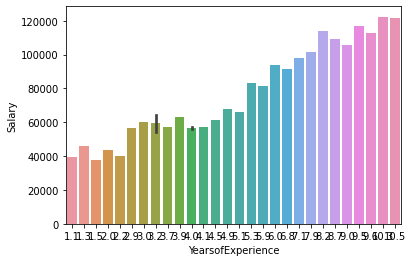

In [108]:
sns.barplot(x='YearsofExperience',y='Salary',data=data)

<AxesSubplot:>

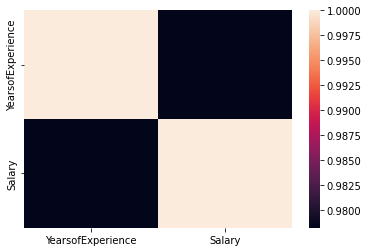

In [111]:
#represents the correlation of data in the columns using a heatmap
sns.heatmap(data.corr())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

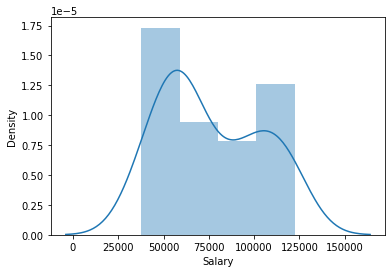

In [114]:
sns.distplot(data.Salary)

### Training and Testing

In [ ]:
#csplit the data into training and testng sets
X_train, X_test, y_train, y_test = train_test_split(data["YearsofExperience"], data["Salary"], test_size=0.2, random_state=0)

In [ ]:
# creating a linear regression model
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.6  4.   5.3  7.9  2.9  5.1  3.2  4.5  8.2  6.8  1.3 10.5  3.   2.2
  5.9  6.   3.7  3.2  9.   2.   1.1  7.1  4.9  4. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.